# Jeff's PLC

## Aviation Risk Analysis for Aircraft Purchases

### Introduction 
This project aims to analyze aviation accident data from the National Transportation Safety Board(1962-2023), to help the company identify the lowest-risk aircraft for a new aviation business expansion.

#### Objectives
- To identify aircrafts that are at low-risk to accidents
- To Provide 3 business recommendations based on data-driven insights
- To Support findings with visualizations

### 2. Business Context

 The company is diversifying into the aviation industry.
 Understanding aircraft safety records is crucial to minimize risks.



### Data Loading

In [19]:
#importing relevant libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Loading Data into a DataFrame called df (with encoding fix)
df=pd.read_csv("AviationData.csv",encoding="ISO-8859-1",low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [21]:
#Filling missing values in all columns with Unknown and dropping duplicates

df.drop_duplicates(inplace=True)
df.fillna("Unknown", inplace=True)
df.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_22084\1016360192.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,...,Personal,Unknown,3.0,Unknown,Unknown,Unknown,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,1.0,2.0,Unknown,0.0,VMC,Approach,Probable Cause,16-04-1980


### Filtering Relevant Columns

In [22]:
#Selecting relevant columns

aircraft_data=["Accident.Number","Event.Date","Location","Injury.Severity","Aircraft.damage"
               ,"Make","Model","Engine.Type","Purpose.of.flight","Total.Fatal.Injuries",
               "Total.Uninjured","Weather.Condition"]
df=df[aircraft_data]
df

,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Make,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Uninjured,Weather.Condition
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,Stinson,108-3,Reciprocating,Personal,2.0,0.0,UNK
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,Piper,PA24-180,Reciprocating,Personal,4.0,0.0,UNK
2,NYC07LA005,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,Cessna,172M,Reciprocating,Personal,3.0,Unknown,IMC
3,LAX96LA321,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,Rockwell,112,Reciprocating,Personal,2.0,0.0,IMC
4,CHI79FA064,1979-08-02,"Canton, OH",Fatal(1),Destroyed,Cessna,501,Unknown,Personal,1.0,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
88884,ERA23LA093,2022-12-26,"Annapolis, MD",Minor,Unknown,PIPER,PA-28-151,Unknown,Personal,0.0,0.0,Unknown
88885,ERA23LA095,2022-12-26,"Hampton, NH",Unknown,Unknown,BELLANCA,7ECA,Unknown,Unknown,0.0,0.0,Unknown
88886,WPR23LA075,2022-12-26,"Payson, AZ",Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,Unknown,Personal,0.0,1.0,VMC
88887,WPR23LA076,2022-12-26,"Morgan, UT",Unknown,Unknown,CESSNA,210N,Unknown,Personal,0.0,0.0,Unknown


In [23]:
#Correcting Make names and dropping missing values
df=df[aircraft_data]
df["Make"] = df["Make"].replace({"CESSNA": "Cessna", "PIPER": "Piper","BOEING":"Boeing"})
df.to_csv("Aviation_clean.csv",index=False)
df.head()


,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Make,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Uninjured,Weather.Condition
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,Stinson,108-3,Reciprocating,Personal,2.0,0.0,UNK
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,Piper,PA24-180,Reciprocating,Personal,4.0,0.0,UNK
2,NYC07LA005,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,Cessna,172M,Reciprocating,Personal,3.0,Unknown,IMC
3,LAX96LA321,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,Rockwell,112,Reciprocating,Personal,2.0,0.0,IMC
4,CHI79FA064,1979-08-02,"Canton, OH",Fatal(1),Destroyed,Cessna,501,Unknown,Personal,1.0,0.0,VMC


### Analysis and Visualization
#### 1. Heatmap of Accident Counts by Location and Make
The heatmap below shows frequency of accidents involving different aircraft makes across various locations. 

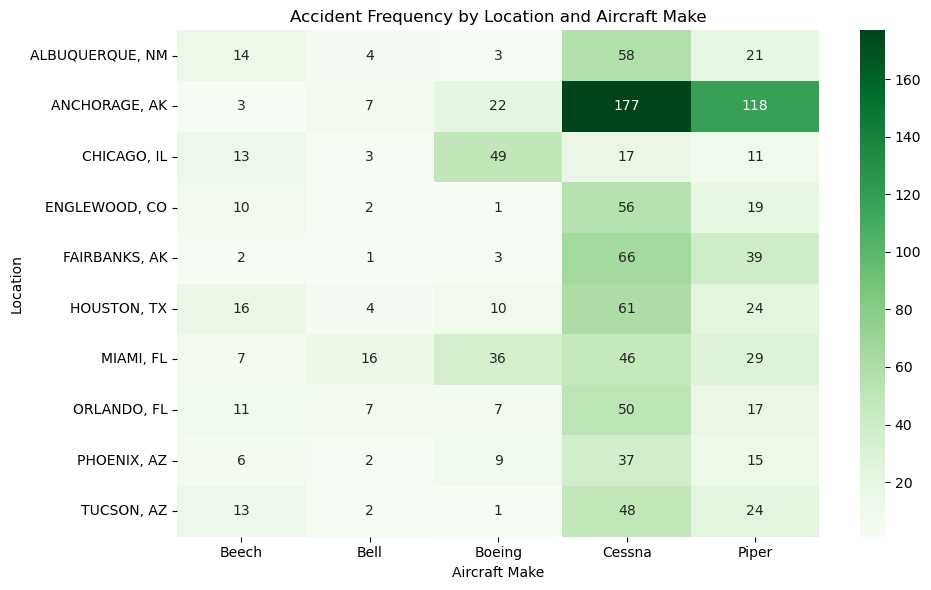

In [24]:


# Cleaning and preparing
df=df[aircraft_data]
dfa = df[['Location', 'Make']].dropna()
bad_makes = dfa['Make'].value_counts().head(5).index
top_locations = dfa['Location'].value_counts().head(10).index

# Filtering to top 5 high accident makes and top 10 locations where accidents occur
filtered_df = dfa[dfa['Make'].isin(bad_makes) & dfa['Location'].isin(top_locations)]

# pivot table
heatmap_data = pd.pivot_table(filtered_df, index='Location', columns='Make', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Greens")
plt.title('Accident Frequency by Location and Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


### 2. Bar Chart-Total Fatal Injuries by Aircraft Make
This bar chart shows which aircraft makes have the highest number of fatal injuries.

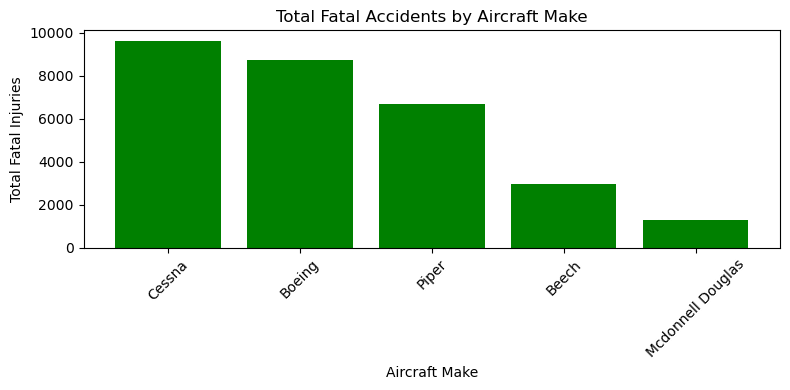

In [25]:
Bar_Chart_Make  = ["Cessna", "Boeing", "Piper", "Beech", "Mcdonnell Douglas"]

# Group by 'Aircraft Make' and sum total fatal injuries
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

# Group and sum

fatal_injuries_by_make = df.groupby(['Make'])['Total.Fatal.Injuries'].sum()

# Filter to the desired makes
Top5_fatal_injuries = fatal_injuries_by_make.loc[Bar_Chart_Make]

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(Top5_fatal_injuries.index, Top5_fatal_injuries.values, color="green")

# Labels and title
ax.set_title('Total Fatal Accidents by Aircraft Make')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Line Plot-Accidents over time by aircraft make
This code will plot the accident trends over time, showing the number of accidents for each aircraft make year by year.

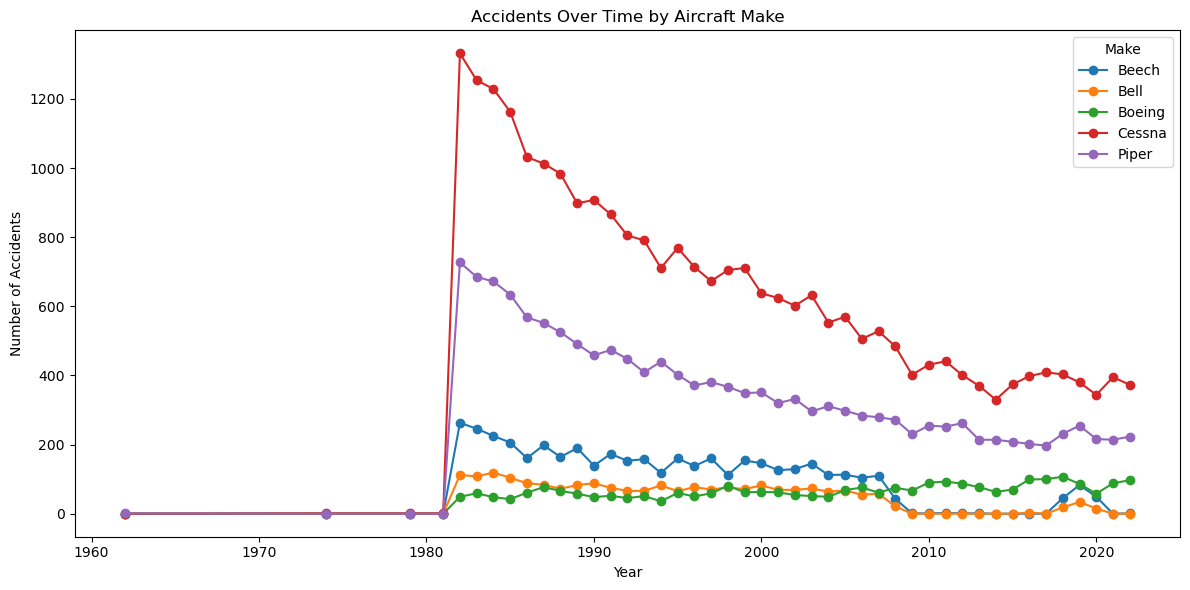

In [26]:
#Extract the year from the 'Event.Date' column
df=df[aircraft_data]

df['Year'] = pd.to_datetime(df['Event.Date']).dt.year

# Get the top 5 aircraft makes by number of accidents
top_5_makes = df['Make'].value_counts().head(5).index

# Filter the dataset to include only top 5 makes
df_filtered = df[df['Make'].isin(top_5_makes)]

# Group by 'Year' and 'Make', then count the accidents
accidents_by_make_year = df_filtered.groupby(['Year', 'Make']).size().unstack().fillna(0)

# Plot the trend over time for each make
accidents_by_make_year.plot(kind='line', marker='o', figsize=(12, 6))

# Set title and labels
plt.title('Accidents Over Time by Aircraft Make')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
#cleaning and Identifying engine types and how damaged they were

df=df[['Engine.Type', 'Aircraft.damage']].head(10)
df.head()

,Engine.Type,Aircraft.damage
0,Reciprocating,Destroyed
1,Reciprocating,Destroyed
2,Reciprocating,Destroyed
3,Reciprocating,Destroyed
4,Unknown,Destroyed


### 4. Bar chart showing aircraft damage by engine type
This chart shows the distribution of aircraft damage across the top 10 most common engine types involved in accidents

<Figure size 1200x600 with 0 Axes>

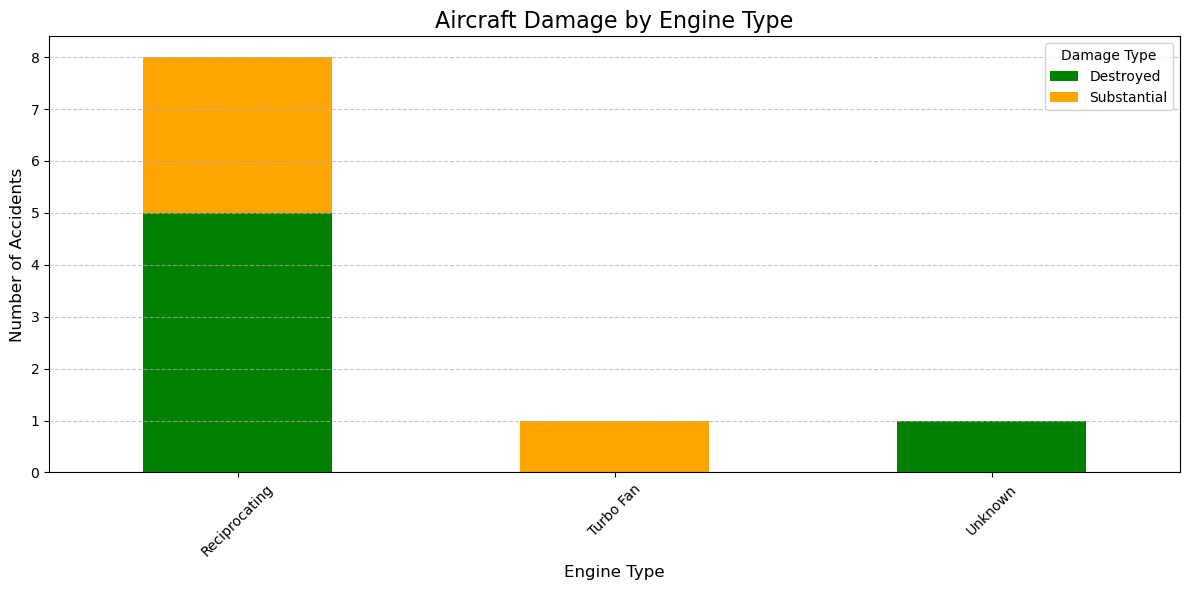

In [28]:
# Filter top engine types
top_engine_types = df['Engine.Type'].value_counts().head(10).index
df_filtered = df[df['Engine.Type'].isin(top_engine_types)]

# Group and reshape
damage_by_engine = df_filtered.groupby(['Engine.Type', 'Aircraft.damage']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
damage_by_engine.plot(kind='bar', stacked=True, color=["Green","orange"], figsize=(12,6))

plt.title('Aircraft Damage by Engine Type', fontsize=16)
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Damage Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Key Findings
1. Cessna and Piper account for the highest fatal injuries, often occurring in specific locations like    Anchorage, though thr accidents are declining over the years.
2. Reciprocating engine types are associated with more extensive aircraft damage.
3. Proritize aircrafts that have consistent safety performance over time.
4. Accidents and fatal injuries over the years and declining.

## Business Recommendations

1. **Avoid Cessna and Piper aircrafts as they have high rate of accidents,although watch out for those with higher fatality injuries.**
2. **Prioritize those that have consistent safety performance over time.**
3. **Avoid aircrafts with Reciprocating Engines.**

## Conclusion

This analysis supports evidence-based decisions about which aircraft types are lower risk for business investment. Future steps could include deeper modeling (e.g., logistic regression on fatality likelihood) and collecting operational cost data.
